In [43]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageFilter, ImageEnhance

In [31]:
image = Image.open('./resources/im.jpg')

In [37]:
def adjust_contrast(image, factor=1.5):
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(factor)

In [49]:
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    return cv2.filter2D(src=np.array(image).copy(), ddepth=-1, kernel=kernel)

In [34]:
def denoising(image):
    return cv2.fastNlMeansDenoisingColored(image_sharp.copy(), None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

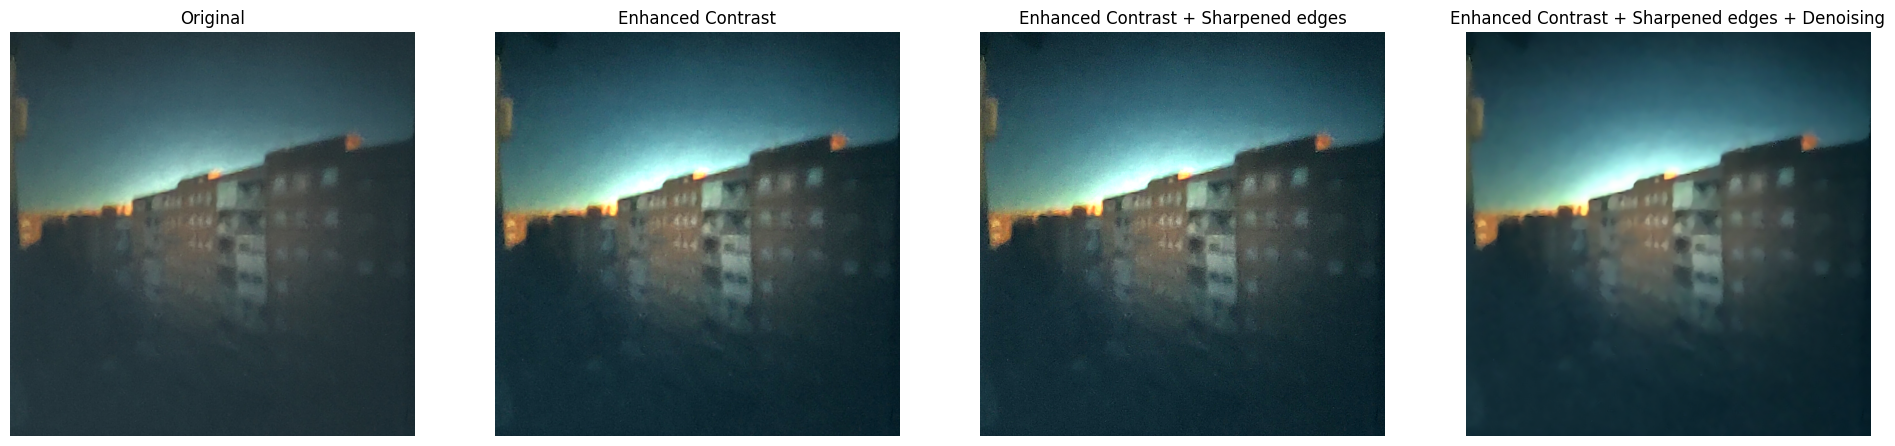

True

In [55]:
enhanced_contrast = adjust_contrast(image)
sharpened_image = sharpen_image(enhanced_contrast)
denoised_image = denoising(image)

original_and_enhanced_contrast = np.hstack((np.array(image), np.array(enhanced_contrast), np.array(sharpened_image), np.array(denoised_image)))

# Mostrar las imágenes
plt.figure(figsize=(24, 8))

# Mostrar la imagen original y las imágenes procesadas
plt.subplot(1, 4, 1)
plt.imshow(np.array(image))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(np.array(enhanced_contrast))
plt.title('Enhanced Contrast')
plt.axis('off')


plt.subplot(1, 4, 3)
plt.imshow(np.array(sharpened_image))
plt.title('Enhanced Contrast + Sharpened edges')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(np.array(denoised_image))
plt.title('Enhanced Contrast + Sharpened edges + Denoising')
plt.axis('off')

plt.show()

cv2.imwrite('./resources/enchanced_image.jpg', cv2.cvtColor(denoised_image, cv2.COLOR_RGB2BGR))